<a href="https://colab.research.google.com/github/AkankshaB123/forecasting/blob/main/Prophet_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Pre-built sklearn metrics
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima, ARIMA, model_selection
import numpy as np
from sklearn.model_selection import ParameterGrid
from prophet.diagnostics import cross_validation, performance_metrics
from prophet import prophet
from prophet.plot import plot_plotly, plot_components_plotly

ImportError: cannot import name 'prophet' from 'prophet' (/usr/local/lib/python3.11/dist-packages/prophet/__init__.py)

# Mount Google Colab Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques /Prophet

/content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques /Prophet


In [ ]:
#Load the data
df = pd.read_csv('Daily Bike Sharing training.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [ ]:
#Change the time Series variable name
df = df.rename(columns={'cnt':'y',
                        'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Change 'ds' into format 'YYYY-MM-DD'
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Prepare the weather situation variable
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df, weather_sit], axis=1)
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [ ]:
#Renaming Variables 2 and 3
df = df.rename(columns={2:'weathersit_2',
                        3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [ ]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant','season', 'yr', 'mnth', 'weekday',
                   'casual','registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [ ]:
#Look at 2012-10-29
df[df['ds'] == '2012-10-29']
# Chat GPT Ask: What happened in Washington DC in October 29th, 2012 and October 30th, 2012 - Hurricane Sandy made landfall

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
667,2012-10-29,0,1,3,0.44,0.4394,0.88,0.3582,22,False,True


In [ ]:
# Replace 29th/30th of October 2012 with values of 28th
#28th because in EDA because weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29','y'] = to_replace
df.loc[df.ds == '2012-10-30','y'] = to_replace

# Exploratory Data Analysis

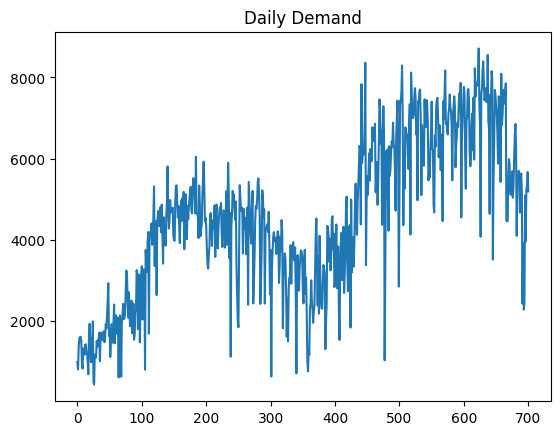

In [ ]:
# Daily
df['y'].plot(title = 'Daily Demand')
plt.show()

<ipython-input-14-d2b801ffe7f7>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['y'].resample('M').mean(),


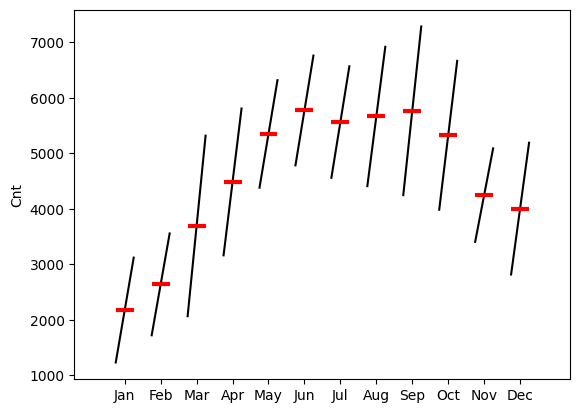

In [ ]:
# Plotting for monthly seasonality
df = df.set_index('ds') # Set 'ds' column as index
month_plot(df['y'].resample('M').mean(),
           ylabel = 'Cnt')
plt.show()

<ipython-input-15-57bc9481e002>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['y'].resample('Q').mean(),


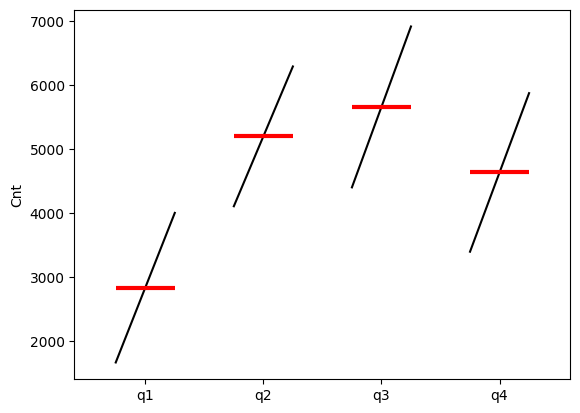

In [ ]:
# Plotting for quarterly seasonality
quarter_plot(df['y'].resample('Q').mean(),
           ylabel = 'Cnt')
plt.show()

In [ ]:
len(df)

701

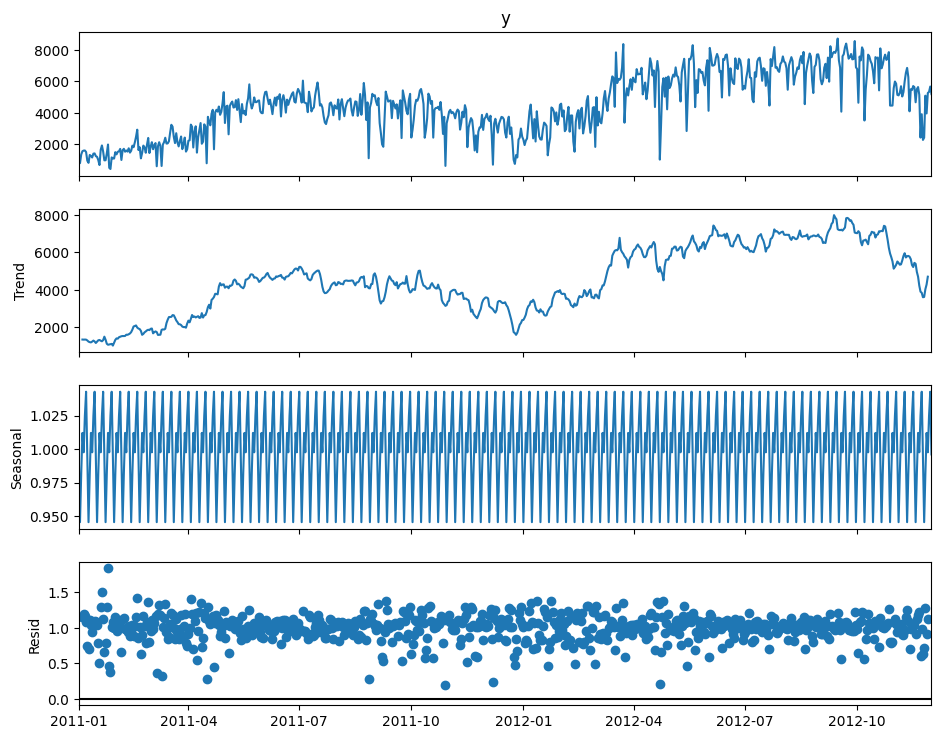

In [ ]:
# Seasonal Decomposition Plots for Bike Sharing Data
# The data has 701 observations, which is not enough for 2 full cycles (730 observations)
# with a period of 365.
# We can either reduce the period or use a different technique.
# Option 1: Reduce the period (e.g., to analyze weekly seasonality)
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period = 7)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

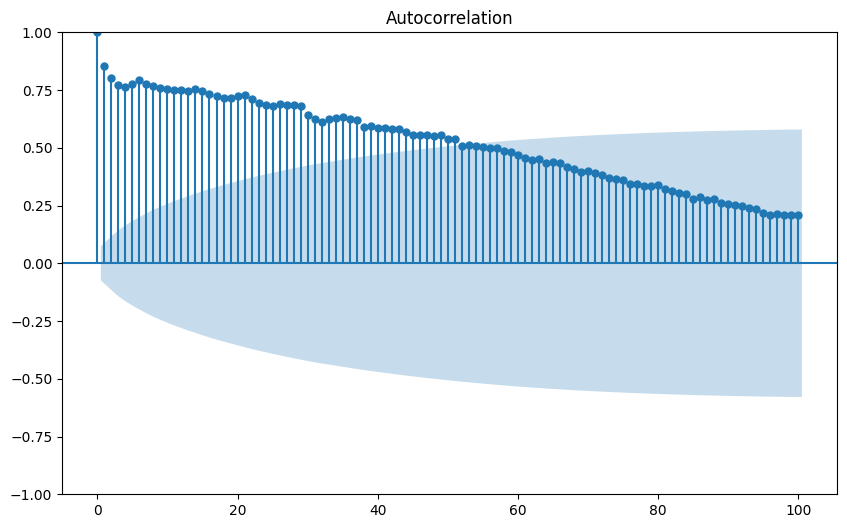

In [ ]:
# Plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

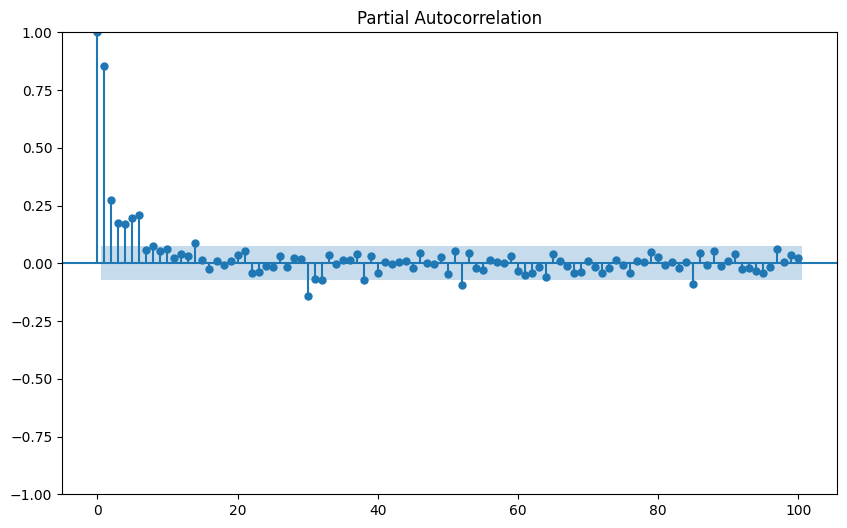

In [ ]:
# Plot the partial auto-correlation (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['y'], lags=100, ax=ax)
plt.show()

# Holidays

In [ ]:
# Check for holidays in our df
df[df.holiday == 1].head(10)

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
ds,,,,,,,,,,
2011-01-17,1,0,2,0.175833,0.176771,0.537500,0.194017,1000,True,False
2011-02-21,1,0,2,0.303333,0.284075,0.605000,0.307846,1107,True,False
2011-04-15,1,0,1,0.446667,0.441913,0.671250,0.226375,3126,False,False
2011-05-30,1,0,1,0.733333,0.671092,0.685000,0.131225,4098,False,False
2011-07-04,1,0,2,0.726667,0.665417,0.637917,0.081479,6043,True,False
2011-09-05,1,0,2,0.673333,0.625646,0.790417,0.212696,3351,True,False
2011-10-10,1,0,1,0.570833,0.542925,0.733750,0.042304,5117,False,False
2011-11-11,1,0,1,0.324167,0.306817,0.446250,0.314675,3368,False,False
2011-11-24,1,0,1,0.373333,0.372471,0.549167,0.167304,1495,False,False


In [ ]:
df = df.reset_index()
df.head(2)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False


In [ ]:
# Holidays
gen_holidays = pd.DataFrame({
    'holiday': 'gen_holiday',
    'ds': df[df.holiday == 1].ds,
    'lower_window': -3,
    'upper_window': 3})
xmas = pd.DataFrame({
    'holiday': 'christmas',
    'ds': pd.to_datetime(['2011-12-24','2012-12-24']),
    'lower_window': -3,
    'upper_window': 3})
nye = pd.DataFrame({
    'holiday': 'new year',
    'ds': pd.to_datetime(['2011-12-31','2012-12-31']),
    'lower_window': -3,
    'upper_window': 3})
easter = pd.DataFrame({
    'holiday': 'easter',
    'ds': pd.to_datetime(['2011-4-24','2012-4-8']),
    'lower_window': -3,
    'upper_window': 3})

In [ ]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays.head()

,holiday,ds,lower_window,upper_window
16,gen_holiday,2011-01-17,-3,3
51,gen_holiday,2011-02-21,-3,3
104,gen_holiday,2011-04-15,-3,3
149,gen_holiday,2011-05-30,-3,3
184,gen_holiday,2011-07-04,-3,3


# Feature Engineering

In [ ]:
# Creating lagged values for the regressors
for lag in [1,3,5,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
  df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)

df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN,NaN
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN,NaN


In [ ]:
#Correlation matrix between the lagged values and y
columns = ['y'] + [f'{var}_lag_{lag}' for var in ['temp', 'atemp'] for lag in [1,3,5,7]]
corr_matrix = df[columns].corr()*100
corr_matrix

,y,temp_lag_1,temp_lag_3,temp_lag_5,temp_lag_7,atemp_lag_1,atemp_lag_3,atemp_lag_5,atemp_lag_7
y,100.000000,59.036828,58.192194,58.997638,59.582970,58.668081,57.707596,58.737432,59.188566
temp_lag_1,59.036828,100.000000,89.224505,86.117271,86.454543,99.152625,88.266282,84.798994,85.267326
temp_lag_3,58.192194,89.224505,100.000000,89.182946,86.061305,87.748899,99.151923,88.218677,84.745071
temp_lag_5,58.997638,86.117271,89.182946,100.000000,89.143206,84.846450,87.708191,99.149044,88.181382
temp_lag_7,59.582970,86.454543,86.061305,89.143206,100.000000,85.311290,84.794039,87.658430,99.147524
atemp_lag_1,58.668081,99.152625,87.748899,84.846450,85.311290,100.000000,86.942999,83.660694,84.237184
atemp_lag_3,57.707596,88.266282,99.151923,87.708191,84.794039,86.942999,100.000000,86.898864,83.607585
atemp_lag_5,58.737432,84.798994,88.218677,99.149044,87.658430,83.660694,86.898864,100.000000,86.853874
atemp_lag_7,59.188566,85.267326,84.745071,88.181382,99.147524,84.237184,83.607585,86.853874,100.000000


In [ ]:
# Kick out all lagged variables but the temp_lag1
df.iloc[:,:-1]

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2012-11-27,0,1,2,0.291667,0.281558,0.786667,0.237562,3959,True,False,0.313333,0.339004,0.278333,0.248742,0.340000,0.350371,0.374167
697,2012-11-28,0,1,1,0.296667,0.289762,0.506250,0.210821,5260,False,False,0.291667,0.281558,0.245833,0.257583,0.368333,0.378779,0.353333
698,2012-11-29,0,1,1,0.280870,0.298422,0.555652,0.115522,5323,False,False,0.296667,0.289762,0.313333,0.339004,0.278333,0.248742,0.340000
699,2012-11-30,0,1,1,0.298333,0.323867,0.649583,0.058471,5668,False,False,0.280870,0.298422,0.291667,0.281558,0.245833,0.257583,0.368333


In [ ]:
df = df.dropna()

# Prophet Model

In [ ]:
# Look at df
df.head(10)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
7,2011-01-08,0,0,2,0.165000,0.162254,0.535833,0.266804,959,True,False,0.196522,0.208839,0.226957,0.229270,0.196364,0.189405,0.344167,0.363625
8,2011-01-09,0,0,1,0.138333,0.116175,0.434167,0.361950,822,False,False,0.165000,0.162254,0.204348,0.233209,0.200000,0.212122,0.363478,0.353739
9,2011-01-10,0,1,1,0.150833,0.150888,0.482917,0.223267,1321,False,False,0.138333,0.116175,0.196522,0.208839,0.226957,0.229270,0.196364,0.189405
10,2011-01-11,0,1,2,0.169091,0.191464,0.686364,0.122132,1263,True,False,0.150833,0.150888,0.165000,0.162254,0.204348,0.233209,0.200000,0.212122
11,2011-01-12,0,1,1,0.172727,0.160473,0.599545,0.304627,1162,False,False,0.169091,0.191464,0.138333,0.116175,0.196522,0.208839,0.226957,0.229270
12,2011-01-13,0,1,1,0.165000,0.150883,0.470417,0.301000,1406,False,False,0.172727,0.160473,0.150833,0.150888,0.165000,0.162254,0.204348,0.233209
13,2011-01-14,0,1,1,0.160870,0.188413,0.537826,0.126548,1421,False,False,0.165000,0.150883,0.169091,0.191464,0.138333,0.116175,0.196522,0.208839
14,2011-01-15,0,0,2,0.233333,0.248112,0.498750,0.157963,1248,True,False,0.160870,0.188413,0.172727,0.160473,0.150833,0.150888,0.165000,0.162254
15,2011-01-16,0,0,1,0.231667,0.234217,0.483750,0.188433,1204,False,False,0.233333,0.248112,0.165000,0.150883,0.169091,0.191464,0.138333,0.116175
16,2011-01-17,1,0,2,0.175833,0.176771,0.537500,0.194017,1000,True,False,0.231667,0.234217,0.160870,0.188413,0.172727,0.160473,0.150833,0.150888


In [ ]:
# Remove any NAs - they won't work with Prophet
df = df.dropna()

In [ ]:
from prophet import Prophet

In [ ]:
# Building the Prophet Model
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            holidays = holidays,
            seasonality_mode = 'multiplicative', #based on the EDA done so far
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/pwxogg6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/lpikfc2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24243', 'data', 'file=/tmp/tmpur9oubfn/pwxogg6s.json', 'init=/tmp/tmpur9oubfn/lpikfc2w.json', 'output', 'file=/tmp/tmpur9oubfn/prophet_modelo2lw2g7w/prophet_model-20250116082555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:25:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:25:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Regressor Coefficients
Prophet is great dealing with collinearity

In [ ]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.266584,0.266584,0.266584
1,temp,multiplicative,0.505308,1.055261,1.055261,1.055261
2,atemp,multiplicative,0.483118,0.342878,0.342878,0.342878
3,hum,multiplicative,0.626288,-0.383856,-0.383856,-0.383856
4,windspeed,multiplicative,0.190637,-0.543448,-0.543448,-0.543448
5,weathersit_2,multiplicative,0.000000,-0.103277,-0.103277,-0.103277
6,weathersit_3,multiplicative,0.000000,-0.419275,-0.419275,-0.419275
7,temp_lag_1,multiplicative,0.505161,-0.523238,-0.523238,-0.523238


# Interpretation - with Chat GPT
Ask: This is the output of the coefficients. Build an agnostic function to read tables like this

In [ ]:
import pandas as pd

def interpret_regressor_coefficients(coefficients_table):
    """
    Interprets a table of regressor coefficients for a Prophet model.

    Args:
        coefficients_table (pd.DataFrame): A DataFrame containing regressor coefficients with columns:
            - regressor: Name of the regressor
            - regressor_mode: Type of the regressor ('additive' or 'multiplicative')
            - center: The centering value for the regressor
            - coef_lower: Lower bound of the coefficient's confidence interval
            - coef: The coefficient value
            - coef_upper: Upper bound of the coefficient's confidence interval

    Returns:
        dict: A dictionary with the regressor names as keys and their interpretations as values.
    """
    interpretation = {}

    for _, row in coefficients_table.iterrows():
        regressor_name = row['regressor']
        regressor_mode = row['regressor_mode']
        coef = row['coef']
        coef_lower = row['coef_lower']
        coef_upper = row['coef_upper']
        center = row['center']

        # Interpreting the regressor coefficient based on the mode (additive/multiplicative)
        if regressor_mode == 'multiplicative':
            # In multiplicative mode, the coefficient represents a percentage change.
            interpretation[regressor_name] = {
                'mode': 'Multiplicative',
                'center': center,
                'coef': coef,
                'coef_lower': coef_lower,
                'coef_upper': coef_upper,
                'interpretation': f"Multiplicative effect. A change in {regressor_name} by 1 unit results in a {coef * 100:.2f}% change in the target variable."
            }
        elif regressor_mode == 'additive':
            # In additive mode, the coefficient represents an additive change.
            interpretation[regressor_name] = {
                'mode': 'Additive',
                'center': center,
                'coef': coef,
                'coef_lower': coef_lower,
                'coef_upper': coef_upper,
                'interpretation': f"Additive effect. A change in {regressor_name} by 1 unit results in an increase/decrease of {coef:.2f} in the target variable."
            }
        else:
            interpretation[regressor_name] = {
                'mode': 'Unknown',
                'center': center,
                'coef': coef,
                'coef_lower': coef_lower,
                'coef_upper': coef_upper,
                'interpretation': "Unknown regressor mode."
            }

    return interpretation


# Call the function to interpret the coefficients
interpretation = interpret_regressor_coefficients(regressor_coefficients(m))

# Print the interpretation
for regressor, details in interpretation.items():
    print(f"Regressor: {regressor}")
    print(f"  Mode: {details['mode']}")
    print(f"  Interpretation: {details['interpretation']}\n")


Regressor: workingday
  Mode: Multiplicative
  Interpretation: Multiplicative effect. A change in workingday by 1 unit results in a 26.66% change in the target variable.

Regressor: temp
  Mode: Multiplicative
  Interpretation: Multiplicative effect. A change in temp by 1 unit results in a 105.53% change in the target variable.

Regressor: atemp
  Mode: Multiplicative
  Interpretation: Multiplicative effect. A change in atemp by 1 unit results in a 34.29% change in the target variable.

Regressor: hum
  Mode: Multiplicative
  Interpretation: Multiplicative effect. A change in hum by 1 unit results in a -38.39% change in the target variable.

Regressor: windspeed
  Mode: Multiplicative
  Interpretation: Multiplicative effect. A change in windspeed by 1 unit results in a -54.34% change in the target variable.

Regressor: weathersit_2
  Mode: Multiplicative
  Interpretation: Multiplicative effect. A change in weathersit_2 by 1 unit results in a -10.33% change in the target variable.

Regr

# Cross-Validation

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

In [ ]:
# How many days we have in the df
df.shape[0]-180

514

In [ ]:
# Apply the CV to the model
df_cv = cross_validation(model = m,
                         period = '15 days',
                         initial = '521 days',
                         horizon = '30 days', # how long are we going to predict
                          parallel = 'processes')
# Look at the CV Output
df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7adc8751af50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/yx6gpv_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/usi9qugt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/zam29q8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55033', 'data', 'file=/tmp/tmpur9oubfn/yx6gpv_x.json', 'init=/tmp/tmpur9oubfn/zam29q8k.json', 'output', 'file=/tmp/tmpur9oubfn/prophet_modell5q69ko1/prophet_model-20250116082610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:26:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/2ab3qtfg.json
DE

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8191.514837,7482.813705,8894.100528,6211,2012-06-19
1,2012-06-21,8518.974306,7834.623286,9245.887389,5905,2012-06-19
2,2012-06-22,8081.410582,7333.040766,8798.586896,5823,2012-06-19
3,2012-06-23,7696.146455,7036.452517,8432.979442,7458,2012-06-19
4,2012-06-24,7849.361289,7127.859714,8496.142683,6891,2012-06-19


In [ ]:
# Performance Metrics
performance_metrics(df_cv)
#Preferred: MAPE & rmse

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.537942e+06,1240.137738,974.108138,0.170827,0.119180,0.162902,0.533333
1,4 days,1.382000e+06,1175.585091,927.095388,0.155267,0.115535,0.151449,0.533333
2,5 days,1.407832e+06,1186.520943,956.457415,0.155509,0.118801,0.152262,0.500000
3,6 days,1.127639e+06,1061.903281,858.139109,0.133601,0.095895,0.135631,0.566667
4,7 days,1.214944e+06,1102.244906,864.927965,0.130502,0.091453,0.135448,0.600000
5,8 days,9.783957e+05,989.138889,756.611496,0.106591,0.090030,0.114343,0.633333
6,9 days,9.613601e+05,980.489700,763.260581,0.107521,0.094846,0.114042,0.566667
7,10 days,1.373204e+06,1171.838083,872.490037,0.126621,0.106781,0.129426,0.500000
8,11 days,1.463769e+06,1209.863182,897.466304,0.134185,0.096869,0.134906,0.533333
9,12 days,1.883379e+06,1372.362589,1055.323103,0.166258,0.119508,0.169147,0.466667


In [ ]:
# rmse and mape
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()*100,2)
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

RMSE: 1244.0
MAPE: 15.75%


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


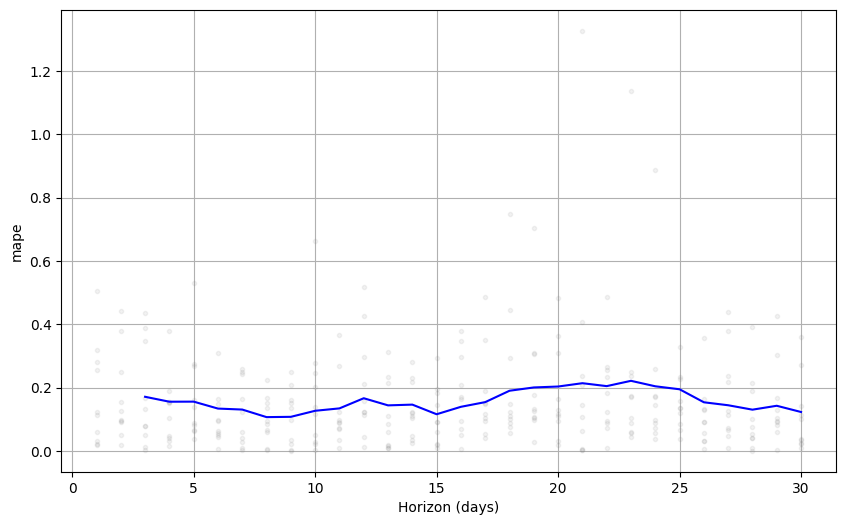

In [ ]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape'); #; is to eliminate duplicates

# Exploring the Error - Fixing 2012-10-29 with Chat GPT
(potential reason why mape is high)

In [ ]:
# Compute the Error/Deviation
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
df_cv['deviation_%'] = (df_cv['yhat']/ df_cv['y']-1)*100

In [ ]:
# Day with the highest deviation
df_cv[df_cv['deviation'] == df_cv['deviation'].max()]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
9,2012-06-29,9080.598085,8399.165847,9799.310042,5463,2012-06-19,3617.598085,66.219991


In [ ]:
df_cv.sort_values(by='deviation', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
9,2012-06-29,9080.598085,8399.165847,9799.310042,5463,2012-06-19,3617.598085,66.219991
17,2012-07-07,8455.223285,7789.311117,9207.094246,4840,2012-06-19,3615.223285,74.694696
18,2012-07-08,7958.671128,7244.395060,8659.006739,4672,2012-06-19,3286.671128,70.348269
290,2012-11-22,5643.235304,4819.312257,6446.583936,2425,2012-11-01,3218.235304,132.710734
11,2012-07-01,8397.661696,7686.123878,9059.497279,5531,2012-06-19,2866.661696,51.828995
1,2012-06-21,8518.974306,7834.623286,9245.887389,5905,2012-06-19,2613.974306,44.267135
292,2012-11-24,4864.996764,3992.013772,5661.632476,2277,2012-11-01,2587.996764,113.658180
2,2012-06-22,8081.410582,7333.040766,8798.586896,5823,2012-06-19,2258.410582,38.784314
16,2012-07-06,8373.350842,7654.127033,9044.977305,6207,2012-06-19,2166.350842,34.901737
293,2012-11-25,4573.513956,3762.119178,5365.185535,2424,2012-11-01,2149.513956,88.676318


In [ ]:
df_cv.sort_values(by='deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
290,2012-11-22,5643.235304,4819.312257,6446.583936,2425,2012-11-01,3218.235304,132.710734
292,2012-11-24,4864.996764,3992.013772,5661.632476,2277,2012-11-01,2587.996764,113.658180
293,2012-11-25,4573.513956,3762.119178,5365.185535,2424,2012-11-01,2149.513956,88.676318
17,2012-07-07,8455.223285,7789.311117,9207.094246,4840,2012-06-19,3615.223285,74.694696
18,2012-07-08,7958.671128,7244.395060,8659.006739,4672,2012-06-19,3286.671128,70.348269
9,2012-06-29,9080.598085,8399.165847,9799.310042,5463,2012-06-19,3617.598085,66.219991
214,2012-10-07,5375.891163,4587.877595,6136.314815,3510,2012-10-02,1865.891163,53.159292
11,2012-07-01,8397.661696,7686.123878,9059.497279,5531,2012-06-19,2866.661696,51.828995
180,2012-09-18,6134.841796,5356.910680,6926.289728,4073,2012-09-17,2061.841796,50.622190
291,2012-11-23,5815.487715,4984.431807,6633.360760,3910,2012-11-01,1905.487715,48.733701


# Parameter Tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10,20],
    'holidays_prior_scale': [10,20],
    'seasonality_mode': ['multiplicative', 'additive']
}

In [ ]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holiday

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:

  # build the model
  m = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            holidays = holidays,
            **params
            )
  m.add_regressor("workingday")
  m.add_regressor("temp")
  m.add_regressor("atemp")
  m.add_regressor("hum")
  m.add_regressor("windspeed")
  m.add_regressor("weathersit_2")
  m.add_regressor("weathersit_3")
  m.add_regressor("temp_lag_1")
  m.fit(df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                         period = '15 days',
                         initial = '521 days',
                         horizon = '30 days', # how long are we going to predict
                          parallel = 'processes')

  # Compute and Store the error
  rmse  = round(performance_metrics(df_cv)['rmse'].mean(),0)
  tuning_results.append(rmse)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/amrxxb42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/wbyn92se.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85181', 'data', 'file=/tmp/tmpur9oubfn/amrxxb42.json', 'init=/tmp/tmpur9oubfn/wbyn92se.json', 'output', 'file=/tmp/tmpur9oubfn/prophet_modelfuklfiez/prophet_model-20250116082638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <conc

In [ ]:
# Parameter Tuning Outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,10,multiplicative,10,1244.0
1,0.05,10,multiplicative,20,1249.0
2,0.05,10,additive,10,981.0
3,0.05,10,additive,20,979.0
4,0.05,20,multiplicative,10,1249.0
5,0.05,20,multiplicative,20,1262.0
6,0.05,20,additive,10,982.0
7,0.05,20,additive,20,984.0
8,0.50,10,multiplicative,10,2106.0
9,0.50,10,multiplicative,20,2094.0


In [ ]:
# Fetch the best params
best_params = all_params[tuning_results.index(min(tuning_results))]

# Predicting the Future

In [ ]:
# Loading the Data and Setting the Index
df_train = pd.read_csv("Daily Bike Sharing training.csv")
df_future = pd.read_csv("Daily Bike Sharing future.csv")
df = pd.concat([df_train, df_future])
df.reset_index(drop=True, inplace=True)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,NaN,NaN,NaN
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,NaN,NaN,NaN
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,NaN,NaN,NaN
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,NaN,NaN
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,NaN,NaN,NaN


In [ ]:
# Change the time series variabe name
df = df.rename(columns={'cnt':'y',
                        'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Prepare the weather situation variable
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df, weather_sit], axis=1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [ ]:
# Renaming variables 2 and 3
df = df.rename(columns = {
    2: 'weathersit_2',
    3: 'weathersit_3'
})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,False,False


In [ ]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant','season', 'yr', 'mnth', 'weekday',
                   'casual','registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False


In [ ]:
# Replace 29/30 of October 2012 with values of 28th
#28th because in EDA we identified weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29','y'] = to_replace
df

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,0,1,2,0.254167,0.226642,0.652917,0.350133,NaN,True,False
727,2012-12-28,0,1,2,0.253333,0.255046,0.590000,0.155471,NaN,True,False
728,2012-12-29,0,0,2,0.253333,0.242400,0.752917,0.124383,NaN,True,False
729,2012-12-30,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,False,False


In [ ]:
# Holidays
gen_holidays = pd.DataFrame({
    'holiday': 'gen_holiday',
    'ds': df[df.holiday == 1].ds,
    'lower_window': -3,
    'upper_window': 3})
xmas = pd.DataFrame({
    'holiday': 'christmas',
    'ds': pd.to_datetime(['2011-12-24','2012-12-24']),
    'lower_window': -3,
    'upper_window': 3})
nye = pd.DataFrame({
    'holiday': 'new year',
    'ds': pd.to_datetime(['2011-12-31','2012-12-31']),
    'lower_window': -3,
    'upper_window': 3})
easter = pd.DataFrame({
    'holiday': 'easter',
    'ds': pd.to_datetime(['2011-4-24','2012-4-8']),
    'lower_window': -3,
    'upper_window': 3})

In [ ]:
# Combine all holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays.head()

,holiday,ds,lower_window,upper_window
16,gen_holiday,2011-01-17,-3,3
51,gen_holiday,2011-02-21,-3,3
104,gen_holiday,2011-04-15,-3,3
149,gen_holiday,2011-05-30,-3,3
184,gen_holiday,2011-07-04,-3,3


In [ ]:
# Create lagged values for the regressors
lag = 1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False,NaN


# Prophet Model

In [ ]:
# Just having the training data
train = df.iloc[:-30]

In [ ]:
# Remove any NAs
train = train.dropna()

In [ ]:
# Building the Prophet Model
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            holidays = holidays,
            **best_params)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/grv0aqiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur9oubfn/1r25cwhw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38840', 'data', 'file=/tmp/tmpur9oubfn/grv0aqiq.json', 'init=/tmp/tmpur9oubfn/1r25cwhw.json', 'output', 'file=/tmp/tmpur9oubfn/prophet_modelx6p7wpgg/prophet_model-20250116092646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [ ]:
# Future Regressors
future_regressors = df.drop(columns = ['ds','y'])
future_regressors = future_regressors.dropna()
future_regressors.reset_index(drop=True, inplace=True)
future_regressors

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,temp_lag_1
0,0,0,2,0.363478,0.353739,0.696087,0.248539,True,False,0.344167
1,0,1,1,0.196364,0.189405,0.437273,0.248309,False,False,0.363478
2,0,1,1,0.200000,0.212122,0.590435,0.160296,False,False,0.196364
3,0,1,1,0.226957,0.229270,0.436957,0.186900,False,False,0.200000
4,0,1,1,0.204348,0.233209,0.518261,0.089565,False,False,0.226957
...,...,...,...,...,...,...,...,...,...,...
725,0,1,2,0.254167,0.226642,0.652917,0.350133,True,False,0.243333
726,0,1,2,0.253333,0.255046,0.590000,0.155471,True,False,0.254167
727,0,0,2,0.253333,0.242400,0.752917,0.124383,True,False,0.253333
728,0,0,1,0.255833,0.231700,0.483333,0.350754,False,False,0.253333


In [ ]:
# Create a future dataframe
future = m.make_future_dataframe(periods = 30, freq = 'D')
future = pd.concat([future, future_regressors], axis=1)
future.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,True,False,0.344167
1,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,False,False,0.363478
2,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,False,False,0.196364
3,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,False,False,0.200000
4,2011-01-06,0,1,1,0.204348,0.233209,0.518261,0.089565,False,False,0.226957


In [ ]:
# Make the Forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,atemp,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-02,2354.043530,-98.214021,1765.596465,2354.043530,2354.043530,-1476.272576,-1476.272576,-1476.272576,-156.074912,...,0.000000,0.000000,0.000000,-546.301626,-546.301626,-546.301626,0.0,0.0,0.0,877.770954
1,2011-01-03,2359.223897,-20.806242,1753.406746,2359.223897,2359.223897,-1502.385187,-1502.385187,-1502.385187,-357.593289,...,659.305597,659.305597,659.305597,-549.610303,-549.610303,-549.610303,0.0,0.0,0.0,856.838710
2,2011-01-04,2364.404264,385.534020,2204.679931,2364.404264,2364.404264,-1053.433759,-1053.433759,-1053.433759,-329.736041,...,659.305597,659.305597,659.305597,-551.955704,-551.955704,-551.955704,0.0,0.0,0.0,1310.970505
3,2011-01-05,2369.584631,874.617608,2587.953503,2369.584631,2369.584631,-668.136988,-668.136988,-668.136988,-308.707909,...,659.305597,659.305597,659.305597,-553.228988,-553.228988,-553.228988,0.0,0.0,0.0,1701.447643
4,2011-01-06,2374.764998,821.474237,2638.781212,2374.764998,2374.764998,-699.588887,-699.588887,-699.588887,-303.877619,...,659.305597,659.305597,659.305597,-553.351142,-553.351142,-553.351142,0.0,0.0,0.0,1675.176111


# Prophet Data visualisation (with Chat GPT)

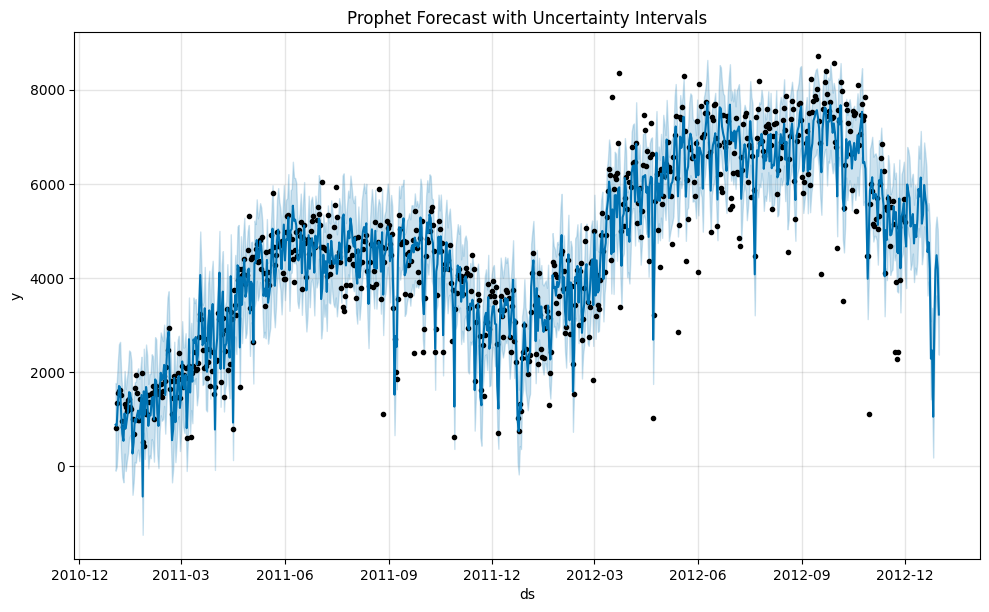

In [ ]:
# Plot the forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast with Uncertainty Intervals")
plt.show()

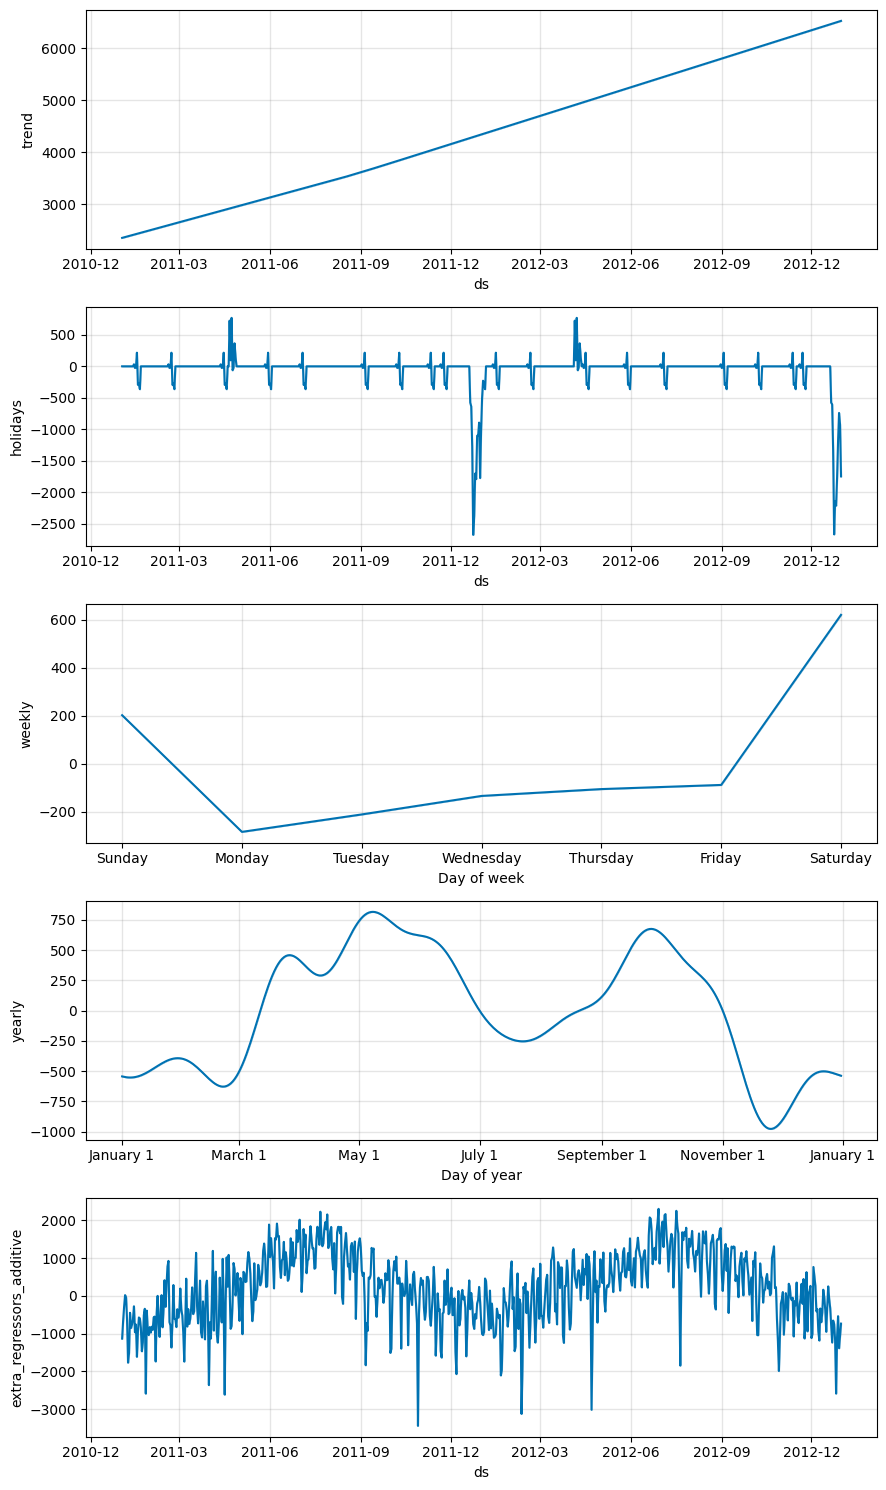

In [ ]:
# Plot the components of the forecast
prophet_model.plot_components(forecast)
plt.show()

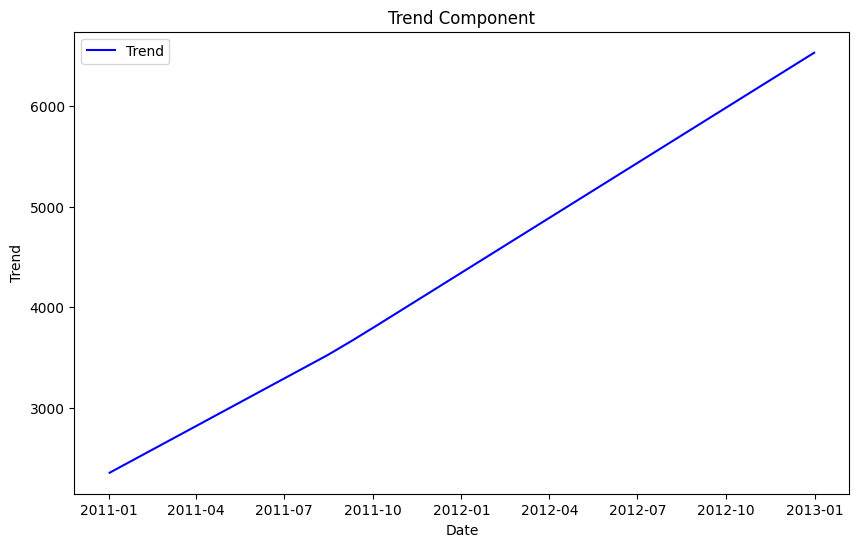

In [ ]:
# Plot just the trend component
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['trend'], label='Trend', color='blue')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title("Trend Component")
plt.legend()
plt.show()

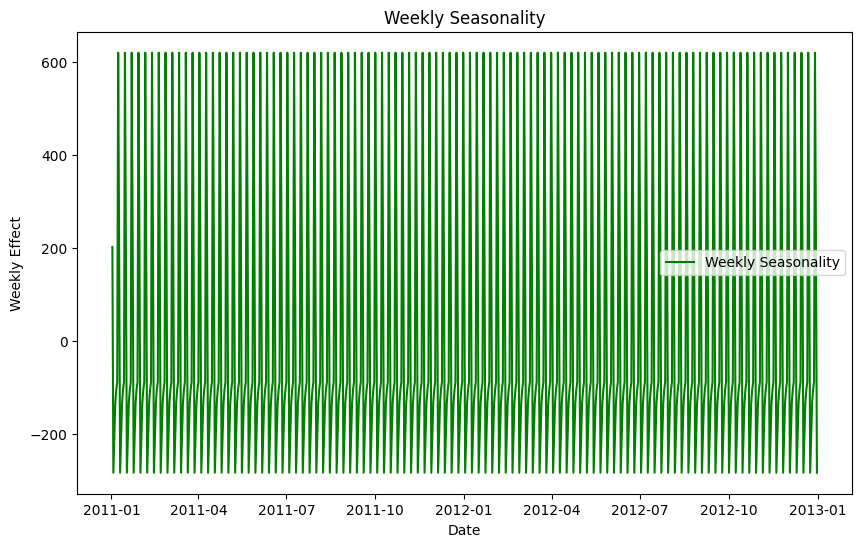

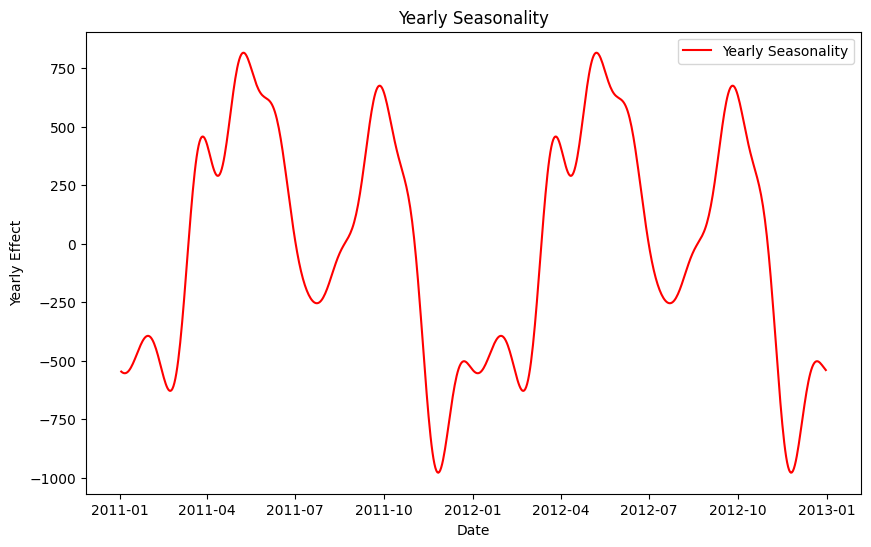

In [ ]:
# Plot weekly seasonality
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['weekly'], label='Weekly Seasonality', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Effect')
plt.title("Weekly Seasonality")
plt.legend()
plt.show()

# Plot yearly seasonality (if present)
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yearly'], label='Yearly Seasonality', color='red')
plt.xlabel('Date')
plt.ylabel('Yearly Effect')
plt.title("Yearly Seasonality")
plt.legend()
plt.show()


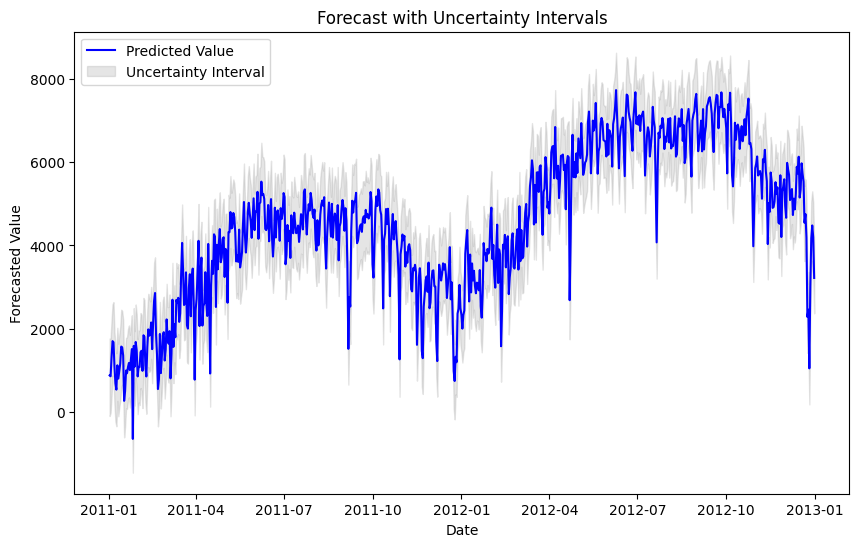

In [ ]:
# Plot the forecast with uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Value', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label="Uncertainty Interval")
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.title("Forecast with Uncertainty Intervals")
plt.legend()
plt.show()


In [ ]:
# Interactive visualisation (using Plotly)
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(prophet_model, forecast)